# Unsupervised Learning : Dimentionality Reduction (Independent Variables only)

### Curse of Dimentionality: Many Machine Learning problems involve thousands or even millions of features for each training instance. Not only does this make training extremely slow, it can also make it much harder to find a good solution. This problem is often referred to as the curse of dimensionality.

#### <span style="color:blue">Reducing Dimentionality with an Example: if we take digit_recognizer dataset, the pixels on the image borders are almost always white, so you could completely drop these pixels from the training set without losing much information. Moreover, two neighboring pixels are often highly correlated: if you merge them into a single pixel (e.g., by taking the mean of the two pixel intensities), you will not lose much information.</span>

  * <span style="color:red"> Warning : Reducing dimensionality does lose some information (just like compressing an image to JPEG can degrade its quality), so even though it will speed up training, it may also make your system perform slightly worse. It also makes your pipelines a bit more complex and thus harder to maintain. So you should first try to train your system with the original data before considering using dimensionality reduction if training is too slow. In some cases, however, reducing the dimensionality of the training data may filter out some noise and unnecessary details and thus result in higher performance (but in general it won’t; it will just speed up training). </span>
  * Apart from performance improvement, dimentionality reduction is useful in data visualization. Reduce multi-dimentional dataset into two dimentions and plot 2D graph to understand patterns in data (may not give right picture in most of the cases)

### ML approaches for Dimentionality Reduction
  * 1) Projection Learning
  * 2) Manifold Learning
  
# 1) Projection Learning:

PCA (Principal Component Analysis) is one of the projection learnings. PCA finds the principal components of data.
  * Principal Components are the directions where there is the most variance, the directions where the data is most spread out.
  * Each of the dimentions (principal components) found by PCA is a linear combination of the n - Features. 
  * **Assumption :** PCA assumes that the direction in which $x_1, x_2, ..., x_n$ show the **most variation** are the direction that **are associated with Y (target variable)**. This assumption is not gaurented to be true, it often tunrs out to be a reasonable enough approximation to give good results.
  * If we have n - features, then we will have n - principal components.
  
<img height="600" width="750" src="./principal_components.png">
  * The first principal component vector ($z_1$) defines the line that is as close as possible to the data.
  * Perpendicular projection of data points on to $z_1$ will result in data with most variance.
  * The second principal component vector ($z_2$) is orthogonal to first principle component and so on...
  <br/>
  <br/>
<font size=4> How to find principal components ?</font>
  * We can use maths **(Eigenvectors and Eigenvalues)** to find the principal component. Eigenvectors and values exist in pairs: every eigenvector has a corresponding eigenvalue. **An eigenvector is a direction of the line**. **An eigenvalue is a number, telling you how much variance there in the data in that direction.** *The p - number of eigenvector with the highest eigenvalue is therefore the principal component out or n - components*.

### Lets take digit recognizer data set and try to understand use of PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')

import random
random.seed(10)

In [2]:
digit_dataset = pd.read_csv('../data/digit_recognizer_train.csv')

In [3]:
digit_dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
digit_X = digit_dataset.iloc[:, 1:]
digit_y = digit_dataset['label']

In [5]:
# By default train_test_split does STRATIFIED split based on label (y-value).
from sklearn.model_selection import train_test_split
digit_X_train, digit_X_test, digit_y_train, digit_y_test = train_test_split(digit_X, digit_y, test_size=0.2)

### scikit-learn PCA parameters:
  * **n_components:** This hyperparameter can be used to specify **number of components (an Integer) ** we want to reduce to OR a float **between 0.0 and 1.0, indicating the ratio of variance you wish to preserve**. "n_components" variable on PCA class give access to Principle Components.
  <br>
  <br>
  * **Explained Varience Ratio:** Explained variance ratio of each principal component, available via the  "explained_variance\_ratio\_" hyperparameter. It indicates the proportion of the dataset's variance that lies along the axis of each principal component.


In [6]:
from sklearn.decomposition import PCA
pca1 = PCA() 
pca1.fit_transform(digit_X_train)

array([[ -3.59749606e+02,   1.35499213e+02,   2.89900291e+02, ...,
          0.00000000e+00,  -0.00000000e+00,   0.00000000e+00],
       [ -6.54584996e+02,   3.72135321e+02,  -5.06996246e+01, ...,
         -2.45549765e-13,   3.97008761e-15,   1.13024390e-13],
       [  5.19108380e+02,   9.03461808e+02,  -2.00365656e+02, ...,
          5.27326015e-13,  -1.74486593e-15,  -6.48641315e-14],
       ..., 
       [  7.13578785e+02,  -2.01930617e+02,   1.59502317e+02, ...,
          3.68126326e-15,  -8.24554090e-16,  -1.76437299e-15],
       [  2.30319781e+02,   3.06310786e+02,   2.98207533e+01, ...,
          1.26049892e-15,  -6.93674167e-16,   2.73924745e-15],
       [  2.91941020e+02,   6.97293347e+02,  -5.76307484e+02, ...,
          4.22005323e-17,  -1.00718870e-15,  -7.76511074e-16]])

### Here we have 784 Principal Components, one for each feature. Note that n\_components\_ variable contains the PCs as horizontal vectors, so, to access first principal component we have to access vector and do a transpose on it (pca.components_. T[:, 0])

In [7]:
pca1.components_[:, :].T.shape ## 784 projection OR 784 principal components

(784, 784)

In [8]:
pca1.explained_variance_ratio_.shape ## One explained varience ratio for each feature hence 784

(784,)

In [9]:
pca1.explained_variance_ratio_[:20] ## See how the PC's explained varience is reducing.

array([ 0.09742654,  0.07157124,  0.06128922,  0.05380712,  0.04885354,
        0.04281422,  0.03281746,  0.02894068,  0.02754226,  0.02351515,
        0.02087336,  0.02046962,  0.01703761,  0.01695386,  0.01593328,
        0.01489771,  0.01313754,  0.01277706,  0.01190479,  0.011559  ])

In [10]:
print("Explained Varience Ratio : ", pca1.explained_variance_ratio_.shape)

Explained Varience Ratio :  (784,)


In [11]:
pca2 = PCA(n_components=20)  ## number of components (an Integer)
pca2.fit_transform(digit_X_train)
pca2.n_components_

20

In [12]:
pca2.components_[:, :].T.shape ## 784 projection, 20 selected top principal components

(784, 20)

In [13]:
pca2.components_[:, 0].T

array([  8.96454820e-18,   1.06135147e-16,  -3.77945060e-17,
         1.64466317e-16,  -9.04456958e-17,  -8.38071430e-17,
        -4.42635350e-17,  -1.35884593e-16,   2.61890391e-17,
         8.94680066e-17,   1.27833929e-17,  -2.66997644e-17,
         1.00728009e-17,   2.82121158e-17,   1.22999812e-16,
        -8.01614696e-18,   5.40566179e-17,  -8.38790336e-17,
         1.13295591e-17,  -3.70533192e-17])

In [14]:
pca3 = PCA(n_components=0.95)  ## ratio of variance you wish to preserve
pca3.fit_transform(digit_X_train)

array([[-359.74960569,  135.49921342,  289.90029085, ...,  -56.03319544,
         -94.49642311,  -90.73551421],
       [-654.58499603,  372.13532071,  -50.69962461, ...,  -58.84351377,
          60.53731154,  -23.94805728],
       [ 519.10837985,  903.46180759, -200.36565604, ...,   51.42863604,
         -44.73587231,   27.07923655],
       ..., 
       [ 713.57878506, -201.93061663,  159.50231692, ...,  -60.01324414,
          59.89070286,  -10.67412172],
       [ 230.31978133,  306.31078581,   29.82075326, ...,  -89.47877412,
         -78.72690924,   76.00371295],
       [ 291.94102044,  697.29334666, -576.30748386, ...,  -26.9491639 ,
         -39.13802929,    6.65939132]])

In [15]:
pca3.components_[:, :].T.shape ## 784 projection, 95% varience preserved, hance we have got 153 selected top principle components.

(784, 153)

In [16]:
pca3.components_[:, 0].T.shape

(153,)

### How to choose Right Number of Dimensions or Principal Components ?
  * So far we have randomly choose dataset's varience preservation percentage "PCA(n_components=0.95)" or number of Principal Components to preserve "PCA(n_components=20)". This is not right always, below are two ways to choose this.

### Way 1:  Take cumulative sum of explained variance of the principal components, pick a threashold for preserving the origianl dataset variance.


In [17]:
arr_cumsum = np.cumsum(pca1.explained_variance_ratio_)
arr_cumsum[:30]

array([ 0.09742654,  0.16899778,  0.230287  ,  0.28409412,  0.33294766,
        0.37576188,  0.40857933,  0.43752001,  0.46506227,  0.48857742,
        0.50945079,  0.5299204 ,  0.54695802,  0.56391187,  0.57984516,
        0.59474287,  0.6078804 ,  0.62065746,  0.63256225,  0.64412125,
        0.65484801,  0.6650048 ,  0.67461334,  0.68382097,  0.69271646,
        0.70113802,  0.70930801,  0.71710277,  0.72451069,  0.73140378])

In [18]:
num_components = np.argmax(arr_cumsum >= 0.96) + 1
print("Number of components for 96% preserverd vairance : ", num_components)

Number of components for 96% preserverd vairance :  179


#### Now use this "num_components"  as a paramenter in PCA(n_components=num_components), get data with dimentionality reduced from 784 to 179 .

In [19]:
pca_96 = PCA(n_components=num_components)
digit_X_train_96 = pca_96.fit_transform(digit_X_train)
digit_X_train_96.shape

(33600, 179)

### Way 2:  Plot the explained variance (cumulative) as a function of the number of dimensions. There will usually be an elbow in the curve, where the explained variance stops growing fast. We can take the number of dimentions at this elbow as the best explained variance.

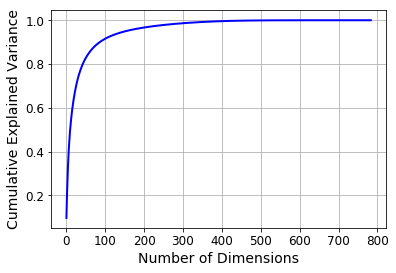

In [20]:
x_lbls = np.arange(len(arr_cumsum))
plt.plot(x_lbls, arr_cumsum, "b-", linewidth=2)
plt.xlabel("Number of Dimensions", fontsize=14) 
plt.ylabel("Cumulative Explained Variance", fontsize=14)   
plt.grid(True)

In [21]:
pca_dim_200 = PCA(n_components=200)
digit_X_train_dim_200 = pca_dim_200.fit_transform(digit_X_train)
digit_X_train_dim_200.shape

(33600, 200)

### decompress the reduced dataset back to 784 dimensions: 
  * We can decompress the reduced dataset back to 784 dimensions by applying the inverse transformation of the PCA projection. **This reconstructed data won't give back the original data,** since the projection lost a bit of information (within the 5% variance that was dropped), but it will likely be quite close to the original data. The mean squared distance between the original data and the reconstructed data (compressed and then decompressed) is called the **"Reconstruction Error"**.

In [22]:
digit_X_train_reconstructed = pca_dim_200.inverse_transform(digit_X_train_dim_200)
digit_X_train_reconstructed.shape

(33600, 784)

In [23]:
digit_X_train.index

Int64Index([12698, 26833, 13925, 35319, 22493,  6151, 32578, 34176, 41259,
            35327,
            ...
            27185,  8964, 20250, 39941, 31125, 26883, 14706, 12055, 35989,
            30896],
           dtype='int64', length=33600)

(-0.5, 27.5, 27.5, -0.5)

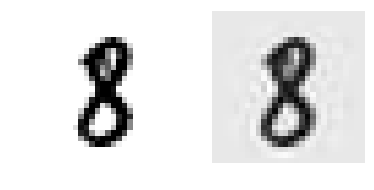

In [24]:
from  matplotlib.cm import  binary

some_digit = digit_X_train.iloc[13361]
some_digit_image = some_digit.reshape(28, 28)

some_digit_recon = digit_X_train_reconstructed[13361]
some_digit_image_recon = some_digit_recon.reshape(28, 28)


#plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(some_digit_image, cmap = binary,
           interpolation="nearest")
plt.axis("off")

plt.subplot(122)
plt.imshow(some_digit_image_recon, cmap = binary,
           interpolation="nearest")
plt.axis("off")

## Incremental PCA
  * One problem with the preceding implementation of PCA is that it requires the whole training set to fit in memory in order for the SVD algorithm to run. **To overcome this memory issue we can use incremental PCA (IPCA) algorithms.** Incremental PCA can take data in mini-batches one mini-batch at a time. This is useful for large training sets, and also to apply PCA online (i.e., on the fly, as new instances arrive). **Please remember to call partial_fit() on IPCA **(insead of fit()).

In [25]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=200)
for batch in np.array_split(digit_X_train, n_batches):
    inc_pca.partial_fit(batch)

digit_X_train_inc = inc_pca.transform(digit_X_train)    
digit_X_train_inc.shape

(33600, 200)

# 2) Manifold Learning

## Kernal PCA
  * Kernal PCA uses a mathemetical technique to derive principle components on high-dimentional space. This technique making it possible to perform complex nonlinear projections for dimensionality reduction. It is often good at preserving clusters of instances after projection, or sometimes even unrolling datasets that lie close to a twisted manifold.

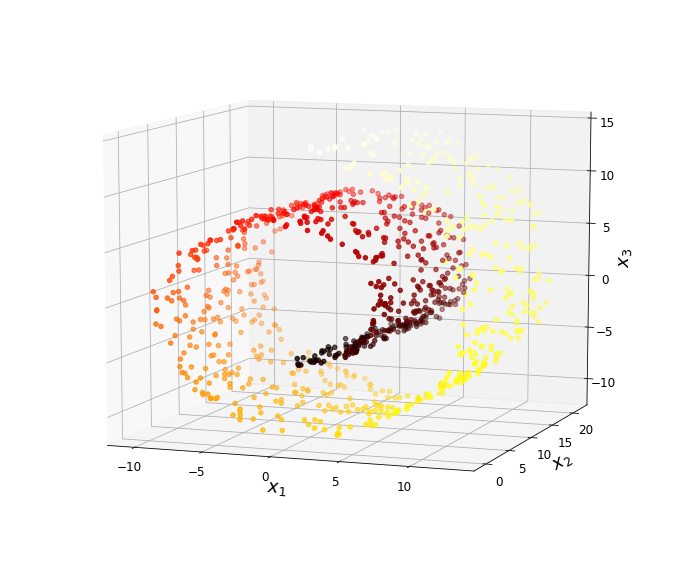

In [26]:
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

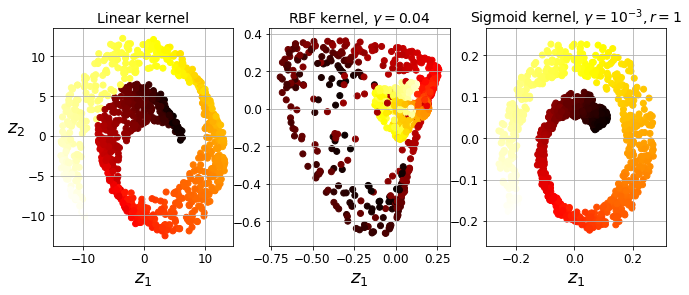

In [28]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

### How to choose Best Kernal and Hyperparameters (KernalPCA is unsupervised)
  * **Approach 1 : One way to select best kernel and hyperparameter values** is to **use "GridSearchCV"** to select the kernel and hyperparameters that lead to the best performance on that task. **(dimensionality reduction is often a preparation step for a supervised learning task)**
  * **Approach 2 : Other way is to (this time entirely unsupervised) select the kernel and hyperparameters that yield the lowest reconstruction error.** To perform Inverse Transformation, we need use fit_inverse_transform = True, by default this is false in KernalPCA class.

### Approach 1 : GridSearchCV

In [28]:
from sklearn.linear_model import LogisticRegression
clf_pipeline = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression())
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf_pipeline, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=2, n_jobs=1,
     random_state=None, remove_zero_eig=False, tol=0)), ('log_reg', LogisticRegre...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kpca__gamma': array([ 0.03   ,  0.03222,  0.03444,  0.03667,  0.03889,  0.04111,
        0.04333,  0.04556,  0.04778,  0.05   ]), 'kpca__kernel': ['rbf', 'sigmoid']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [29]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


### Approach 2: Reconstruction Error

In [30]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
rbf_X_reduced = rbf_pca.fit_transform(X)
print("RBF reduced shape", rbf_X_reduced.shape)
rbf_X_preimage = rbf_pca.inverse_transform(X_reduced)

RBF reduced shape (1000, 2)


In [31]:
sigmoid_pca = KernelPCA(n_components = 2, kernel="sigmoid",
                    fit_inverse_transform=True)
sigmoid_X_reduced = sigmoid_pca.fit_transform(X)
sigmoid_X_preimage = sigmoid_pca.inverse_transform(X_reduced)

In [32]:
linear_pca = KernelPCA(n_components = 2, kernel="linear",
                    fit_inverse_transform=True)
linear_X_reduced = linear_pca.fit_transform(X)
linear_X_preimage = linear_pca.inverse_transform(X_reduced)

In [33]:
from sklearn.metrics import mean_squared_error

print("RBF Reconstrution Error : ", mean_squared_error(X, rbf_X_preimage))
print("Sigmoid Reconstrution Error : ", mean_squared_error(X, sigmoid_X_preimage))
print("Linear Reconstrution Error : ", mean_squared_error(X, linear_X_preimage))

RBF Reconstrution Error :  41.3917330901
Sigmoid Reconstrution Error :  60.7620737148
Linear Reconstrution Error :  82.2243509397


## LocallyLinearEmbedding (LLE) : 
  * **LLE** is another very powerful nonlinear dimensionality reduction (NLDR) technique. It is a Manifold Learning technique that does not rely on projections like the previous algorithms. In a nutshell, LLE works by first measuring how each training instance linearly relates to its closest neighbors, and then looking for a low-dimensional representation of the training set where these local relationships are best preserved. This makes it particularly good at unrolling twisted manifolds, especially when there is not too much noise.

In [34]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
lle_X_reduced = lle.fit_transform(X)

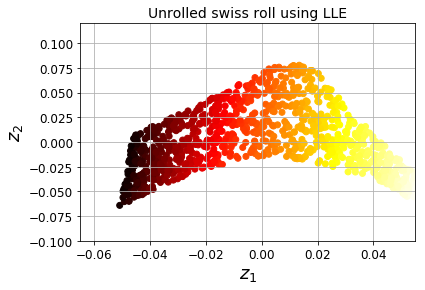

In [35]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(lle_X_reduced[:, 0], lle_X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

  * There is no inverse_transform method, hence only way to check if dimentionality reduction happened properly or not is the use GridSearchCV only.

### How LLE works:
  * **Step 1:** for each training instance $x^i$, the algorithm identifies its k closest neighbors (in the preceding code k = 10), then tries to reconstruct $x^i$ as a linear function of these neighbors. More specifically, it finds the weights $W_i,_j$ such that the squared distance between $x^i$ and $\sum_{j=1}^m W_i,_j x^j$ is as small as possible, 
    * Assuming $W_i,_j = 0 $ if $x^j$ is not one of the k closest neighbors of $x^i$.
  * **Step 2:** map the training instances into a d-dimensional space (where d < n) while preserving these local relationships as much as possible. If $z^i$ is a sub set of the row $x^i$ in the d-dimensional space, then we want the squared distance between $z^i$ and  $\sum_{j=1}^m W_i,_j^| z^j$ to be as small as possible.

# Apply PCA on Housing Price Data Set - Do Polynomial Regression

In [36]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures

In [37]:
housing_train_set = pd.read_csv('../data/cleaned_housing_train_set.csv')
X_features  = [feature for feature in housing_train_set.columns if feature not in ['SalePrice', 'Id']]
y_feature = 'SalePrice'

In [38]:
class InputOutputFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, in_attr_list, our_feature):
        self.in_attr_list = in_attr_list
        self.our_feature = our_feature
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.in_attr_list].values, X[self.our_feature].values
    
def defineInOutPipeling(X_feat, y_feat):
    pipeline_inout_features = Pipeline([
        ('inputOutputFeatureSelector', InputOutputFeatureSelector(X_feat, y_feat))
    ])
    return pipeline_inout_features    

In [39]:
pipeline_inout_features = defineInOutPipeling(X_features, y_feature)

In [40]:
X_train, y_train = pipeline_inout_features.fit_transform(housing_train_set)

In [41]:
X_train.shape

(1149, 98)

#### Apply PCA on X_train and see number of features for keeping 99.99% variance in dataset. 

In [42]:
housing_pca = PCA(n_components=0.99999999)

X_train_pca = housing_pca.fit_transform(X_train)
X_train_pca.shape

(1149, 54)

In [43]:
ploy_features = PolynomialFeatures()
minMaxScaler = MinMaxScaler()
sgd_reg = SGDRegressor(random_state=15)

pipe = Pipeline(steps=[('ploy_features', ploy_features), 
                       ('minMaxScaler', minMaxScaler),
                       ('sgd_reg', sgd_reg)])

In [44]:
print(ploy_features.get_params().keys())

dict_keys(['degree', 'include_bias', 'interaction_only'])


In [45]:
param_grid = [
    {'ploy_features__degree': [2,3,4],
    'sgd_reg__n_iter': [25, 50],
    'sgd_reg__penalty': ['elasticnet']}
  ]
grid_search = GridSearchCV(pipe, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('ploy_features', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('minMaxScaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('sgd_reg', SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=15, shuffle=True, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'ploy_features__degree': [2, 3, 4], 'sgd_reg__n_iter': [25, 50], 'sgd_reg__penalty': ['elasticnet']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [46]:
grid_search.best_params_

{'ploy_features__degree': 2,
 'sgd_reg__n_iter': 50,
 'sgd_reg__penalty': 'elasticnet'}

In [47]:
grid_search.best_estimator_

Pipeline(steps=[('ploy_features', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('minMaxScaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('sgd_reg', SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty='elasticnet', power_t=0.25,
       random_state=15, shuffle=True, verbose=0, warm_start=False))])

In [48]:
pipeline_ploy_scale = Pipeline(steps=[('ploy_features', PolynomialFeatures(degree=2)), 
                                      ('minMaxScaler', MinMaxScaler())])

In [49]:
X_train_trans = pipeline_ploy_scale.fit_transform(X_train_pca, y_train)


In [50]:
X_train_trans.shape

(1149, 1540)

In [51]:
best_sgd = SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty='elasticnet', power_t=0.25,
       random_state=15, shuffle=True, verbose=0, warm_start=False)

In [52]:
best_sgd.fit(X_train_trans, y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty='elasticnet', power_t=0.25,
       random_state=15, shuffle=True, verbose=0, warm_start=False)

In [53]:
pred_y_train = best_sgd.predict(X_train_trans)

In [54]:
from sklearn.metrics import mean_squared_error, r2_score
print("Root Mean Squred Error : ", np.sqrt(mean_squared_error(y_train, pred_y_train)))
print("R-Squared : ", r2_score(y_train, pred_y_train))

Root Mean Squred Error :  42838.3875332
R-Squared :  0.728080743073
